**<font size="6">Challenge 3</font>**

**<font size="5">MSc in Health Informatics - UniSR - A.Y. 2024-2025</font>**

Prof. Lara Cavinato - Dott. Vittorio Torri

---

<font size="4">Challenge 3</font>

# Libraries

In [ ]:
!pip install tableone

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [ ]:
from tableone import TableOne

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.api import Logit, add_constant

from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from scipy.stats import chi2_contingency
from scipy.stats import levene, ttest_ind

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install causalinference
from causalinference import CausalModel

In [ ]:
!pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/statistica/'
df = pd.read_csv(PATH + 'dataset_challenge_3.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/statistica/')

In [ ]:
df

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,...,Diabetes,Homeless,NursingHomeResident,Age,FunctionalStatus,Hospital,Year,NumberComorbidities,Vaccinated,Survived
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,28.0,NotRestricted,17,2016,>=2,1,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,12.0,NotRestricted,10,2012,>=2,1,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,59.0,NotRestricted,8,2017,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,Limited,13,2016,>=2,1,1
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,91.0,NotRestricted,12,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,69.0,NotRestricted,1,2015,1,0,0
1478,1,0,1,0,0,0,1,0,0,0,...,0,0,0,3.0,NotRestricted,12,2016,>=2,0,0
1479,0,1,0,0,0,0,0,0,1,0,...,1,0,0,82.0,Limited,3,2017,>=2,1,0
1480,0,0,0,0,0,0,0,1,0,0,...,0,0,0,37.0,NotRestricted,17,2016,>=2,0,0


In [ ]:
#Remove Pregnant, Homeless and NursingHome
df = df[df['Pregnant'] == 0]
df = df[df['Homeless'] == 0]
df = df[df['NursingHomeResident'] == 0]

df=df.drop(columns=['Pregnant', 'Homeless', 'NursingHomeResident'])

# Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1481
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ChronicCardiacDisease       1415 non-null   int64  
 1   ChronicRespiratoryDisease   1415 non-null   int64  
 2   ChronicNeurologicalDisease  1415 non-null   int64  
 3   ChronicRenalDisease         1415 non-null   int64  
 4   LiverDisease                1415 non-null   int64  
 5   Malignancy                  1415 non-null   int64  
 6   Immunosuppression           1415 non-null   int64  
 7   MaleSex                     1415 non-null   int64  
 8   IndigenousAustralian        1415 non-null   int64  
 9   Smoking                     1415 non-null   int64  
 10  Obesity                     1415 non-null   int64  
 11  Diabetes                    1415 non-null   int64  
 12  Age                         1415 non-null   float64
 13  FunctionalStatus            1415 non-n

In [ ]:
num_vars = ['Age']
cat_vars = ['ChronicCardiacDisease', 'ChronicRespiratoryDisease',
       'ChronicNeurologicalDisease', 'ChronicRenalDisease', 'LiverDisease',
       'Malignancy', 'Immunosuppression', 'MaleSex', 'IndigenousAustralian',
       'Smoking', 'Obesity', 'Diabetes', 'FunctionalStatus', 'Hospital', 'Year',
       'NumberComorbidities', 'Vaccinated', 'Survived']

In [ ]:
xvars = ['Age', 'ChronicCardiacDisease', 'ChronicRespiratoryDisease',
       'ChronicNeurologicalDisease', 'ChronicRenalDisease', 'LiverDisease',
       'Malignancy', 'Immunosuppression', 'MaleSex', 'IndigenousAustralian',
       'Smoking', 'Obesity', 'Diabetes', 'FunctionalStatus', 'Hospital',
       'NumberComorbidities', 'Vaccinated']

y = 'Survived'

In [ ]:
#Descriptive Table
table1 = TableOne(df, columns=xvars, groupby='Vaccinated', pval=False)
print(table1)

                                                  Grouped by Vaccinated                                       
                                                                Missing      Overall            0            1
n                                                                               1415          857          558
Age, mean (SD)                                                        0  41.4 (27.2)  35.1 (23.6)  51.1 (29.5)
ChronicCardiacDisease, n (%)      0                                       993 (70.2)   589 (68.7)   404 (72.4)
                                  1                                       422 (29.8)   268 (31.3)   154 (27.6)
ChronicRespiratoryDisease, n (%)  0                                      1131 (79.9)   716 (83.5)   415 (74.4)
                                  1                                       284 (20.1)   141 (16.5)   143 (25.6)
ChronicNeurologicalDisease, n (%) 0                                      1161 (82.0)   699 (81.6)   462 (82.8)
 

In [ ]:
#Vaccinated - Survived
print(df["Survived"].value_counts())
print(df["Survived"].value_counts(normalize=True))
print(df["Vaccinated"].value_counts())
print(df["Vaccinated"].value_counts(normalize=True))
print(df.groupby('Vaccinated')["Survived"].value_counts())
print(df.groupby('Vaccinated')["Survived"].value_counts(normalize=True))

Survived
1    960
0    455
Name: count, dtype: int64
Survived
1    0.678445
0    0.321555
Name: proportion, dtype: float64
Vaccinated
0    857
1    558
Name: count, dtype: int64
Vaccinated
0    0.605654
1    0.394346
Name: proportion, dtype: float64
Vaccinated  Survived
0           1           628
            0           229
1           1           332
            0           226
Name: count, dtype: int64
Vaccinated  Survived
0           1           0.732789
            0           0.267211
1           1           0.594982
            0           0.405018
Name: proportion, dtype: float64


## Barplot

In [ ]:
colors = ['#baddf5', '#cc2b2b']

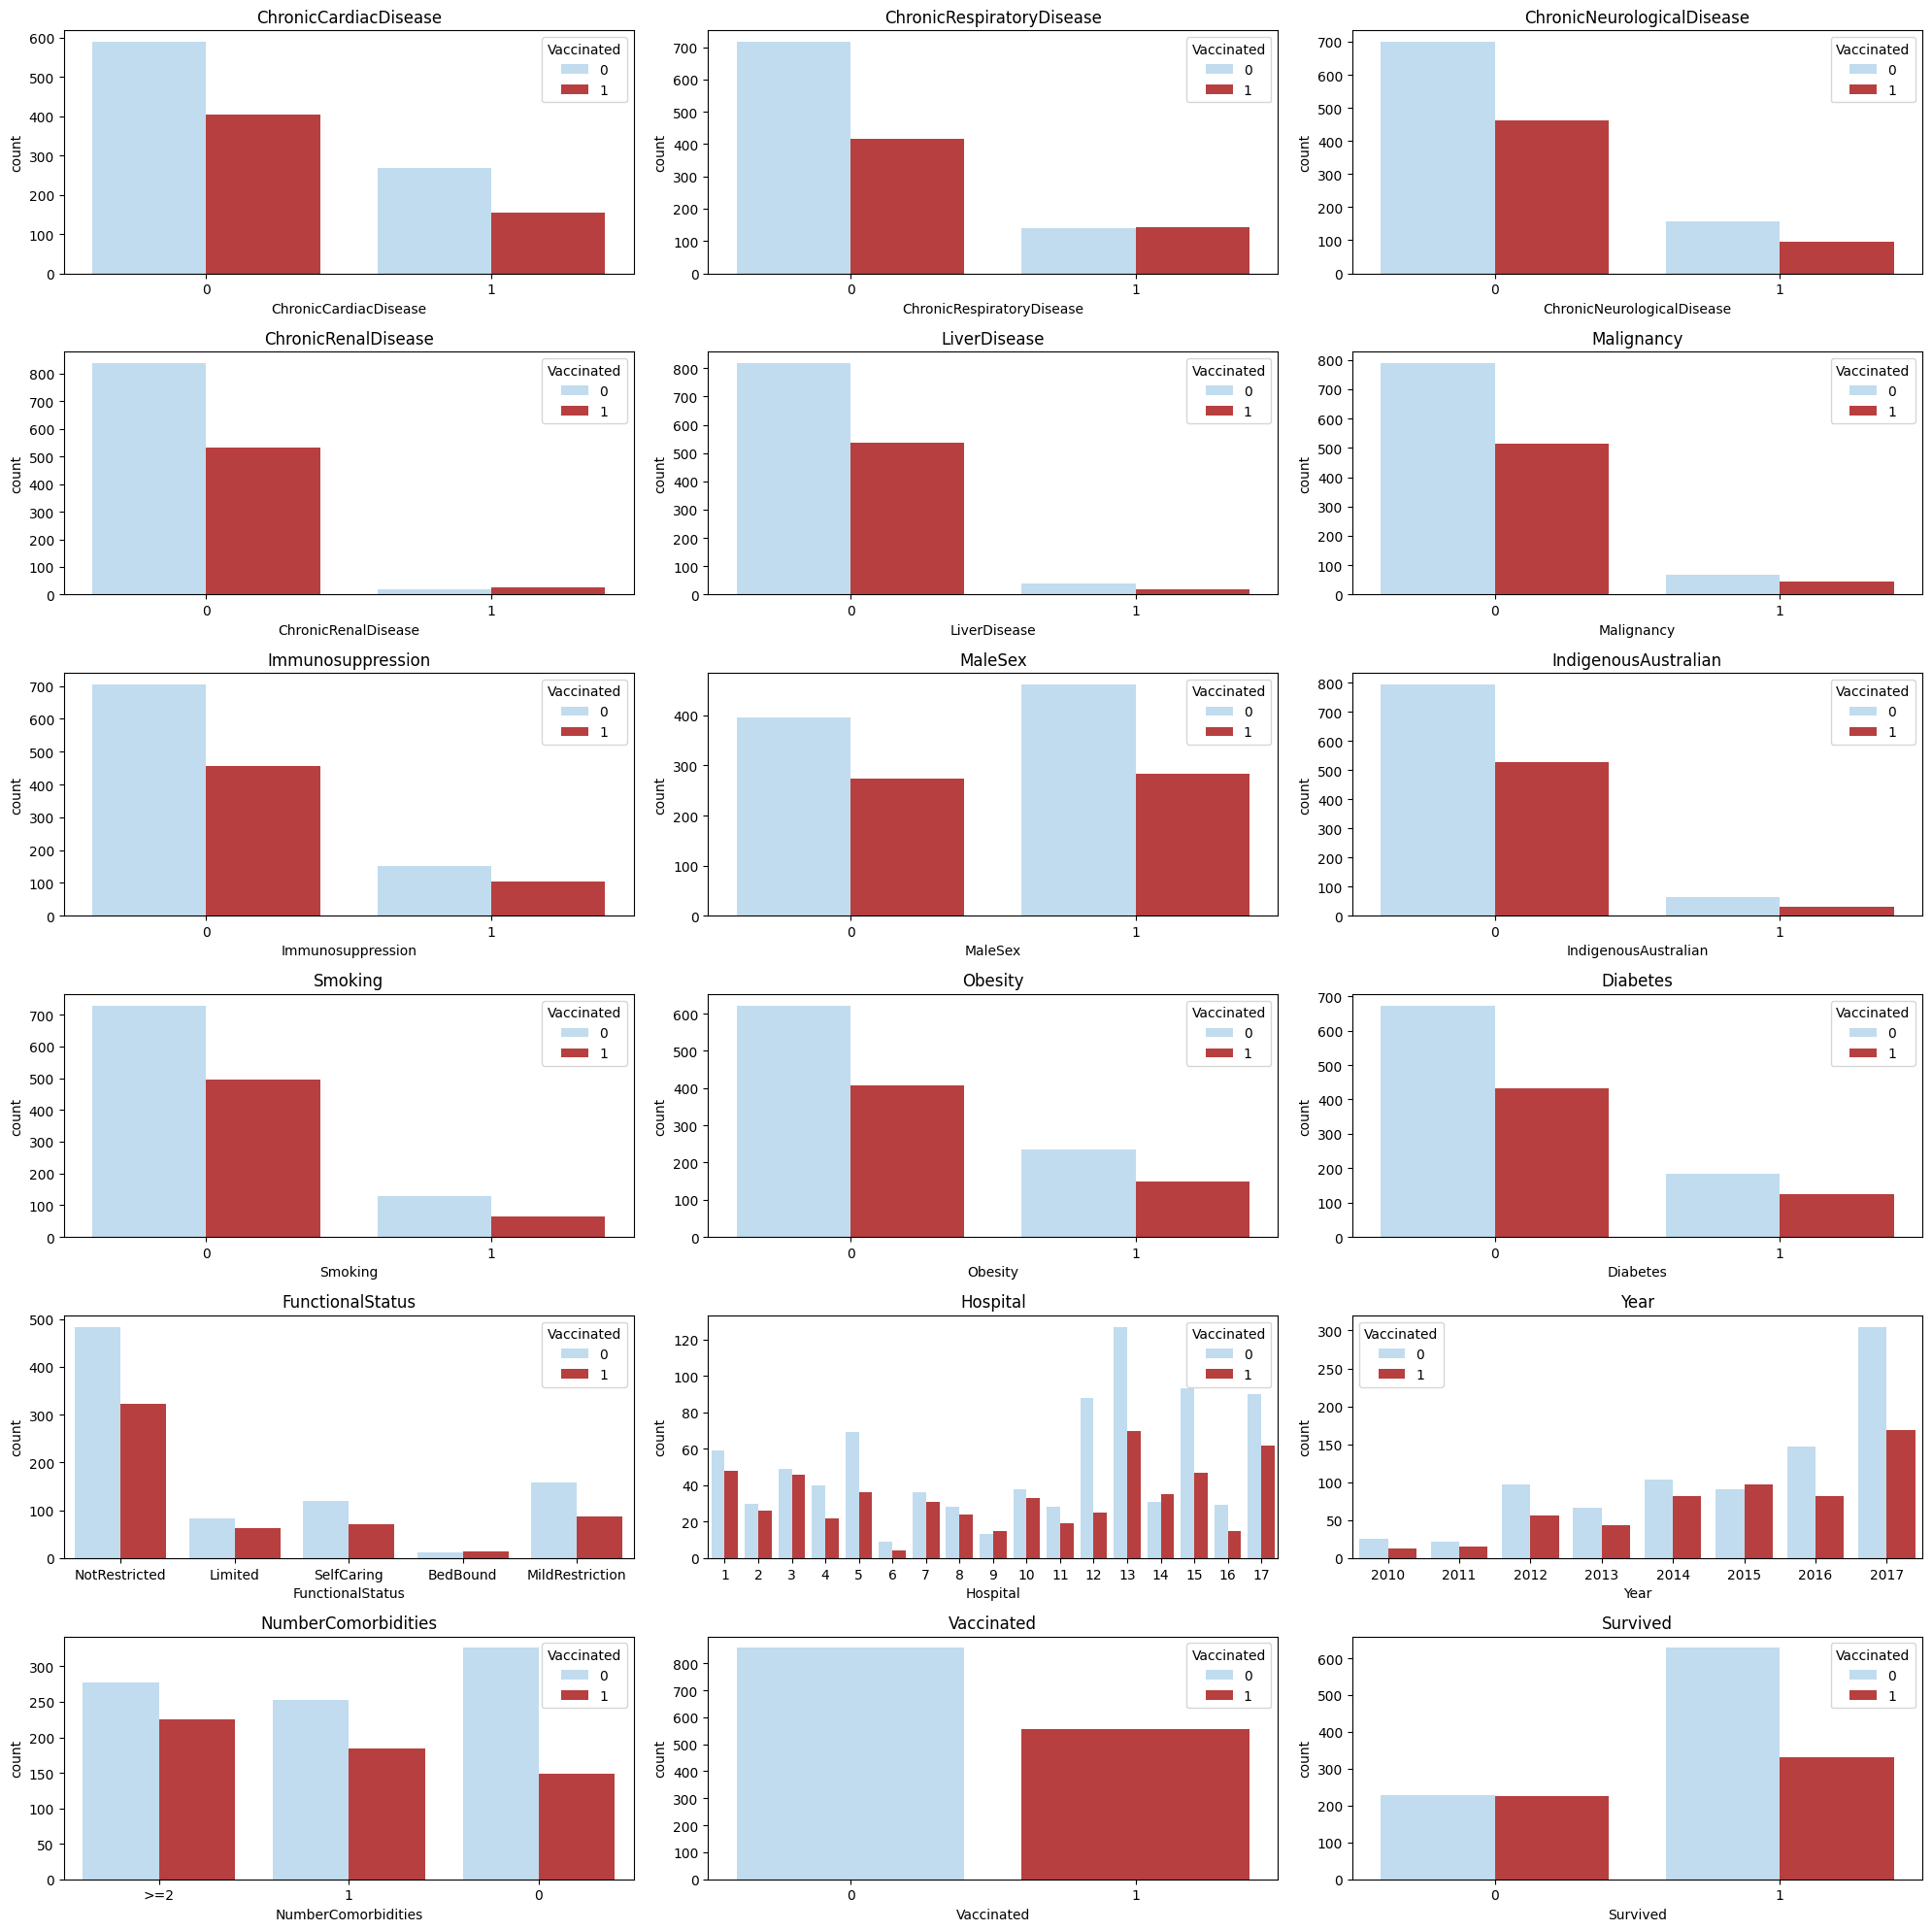

In [ ]:
fig, ax = plt.subplots(nrows = 6, ncols = 3,figsize = (20,20))

ax = ax.flatten()
for i in range(len(cat_vars)):
    sns.countplot(data=df, x=cat_vars[i], palette=colors, hue='Vaccinated', ax=ax[i])
    title = cat_vars[i]
    ax[i].set_title(title)
plt.tight_layout()
plt.show()

<ipython-input-20-abd6b66c75ea>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['NO', 'YES'])


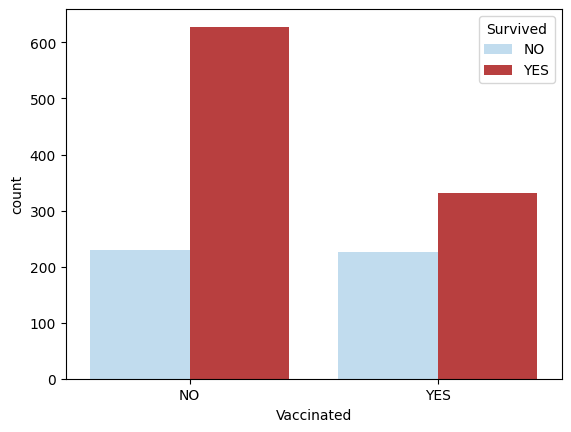

In [ ]:
ax = sns.countplot(data=df, x='Vaccinated', palette=colors, hue='Survived')

ax.set_xticklabels(['NO', 'YES'])
legend_labels = ['NO', 'YES']
ax.legend(title='Survived', labels=legend_labels)

## Histograms

<Axes: xlabel='Age', ylabel='Count'>

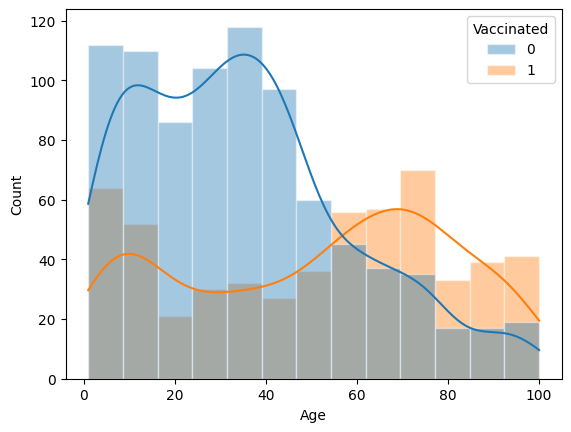

In [ ]:
sns.histplot(
      data=df, x='Age', kde=True,
      alpha=.4, edgecolor=(1, 1, 1, .4),
      hue='Vaccinated'
    )

## Multivariate Analysis

### T-test Age in Vaccinated groups

In [ ]:
vaccinated_0 = df[df['Vaccinated'] == 0]
vaccinated_1 = df[df['Vaccinated'] == 1]
var = 'Age'

# Test di Levene
stat, p_value_levene = levene(vaccinated_0[var], vaccinated_1[var])
print(f"\nVariable: {var}")
print(f"Levene's test p-value for equal variances: {p_value_levene}")

# Test t di Student
t_stat, p_value_ttest = ttest_ind(vaccinated_0[var], vaccinated_1[var],
                                  equal_var=(p_value_levene >= 0.05), alternative='two-sided')
print(f"T-test p-value: {p_value_ttest}")

#Confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(vaccinated_0[var]), sms.DescrStatsW(vaccinated_1[var]))
conf_int = cm.tconfint_diff(usevar=('unequal' if p_value_levene < 0.05 else 'pooled'))
print(f"95% Confidence interval for the difference in means: {conf_int}")
conf_int_width = conf_int[1] - conf_int[0]
print(f"Width of the confidence interval: {conf_int_width}")

if p_value_ttest < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


Variable: Age
Levene's test p-value for equal variances: 3.1252051540458485e-14
T-test p-value: 1.0107386362274592e-25
95% Confidence interval for the difference in means: (-18.91236555781048, -13.088065218884077)
Width of the confidence interval: 5.824300338926404
The difference in means is statistically significant.


### T-test Age in Vaccinated groups

In [ ]:
survived_0 = df[df['Survived'] == 0]
survived_1 = df[df['Survived'] == 1]
var = 'Age'

# Test di Levene
stat, p_value_levene = levene(survived_0[var], survived_1[var])
print(f"\nVariable: {var}")
print(f"Levene's test p-value for equal variances: {p_value_levene}")

# Test t di Student
t_stat, p_value_ttest = ttest_ind(survived_0[var], survived_1[var],
                                  equal_var=(p_value_levene >= 0.05), alternative='two-sided')
print(f"T-test p-value: {p_value_ttest}")

# Confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(survived_0[var]), sms.DescrStatsW(survived_1[var]))
conf_int = cm.tconfint_diff(usevar=('unequal' if p_value_levene < 0.05 else 'pooled'))
print(f"95% Confidence interval for the difference in means: {conf_int}")
conf_int_width = conf_int[1] - conf_int[0]
print(f"Width of the confidence interval: {conf_int_width}")

if p_value_ttest < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


Variable: Age
Levene's test p-value for equal variances: 3.9225603392995085e-10
T-test p-value: 1.3983315536086708e-16
95% Confidence interval for the difference in means: (10.381716852664509, 16.66068241473475)
Width of the confidence interval: 6.278965562070242
The difference in means is statistically significant.


### Chi-Square test between Cat-vars and Vaccinated

In [ ]:
significative = []
not_significative = []

for i in cat_vars:
  cont_table = pd.crosstab(df[i], df['Vaccinated'])
  res = chi2_contingency(cont_table)
  print(f"\n\nThe p-value for the variabile {i} is {res.pvalue}")
  if res.pvalue < 0.05:
    significative.append(i)
  else:
    not_significative.append(i)

print(f"\n\nThe significative variables are {significative}")
print(f"\n\nThe not significative variables are {not_significative}")



The p-value for the variabile ChronicCardiacDisease is 0.15658888515951877


The p-value for the variabile ChronicRespiratoryDisease is 3.427622824182736e-05


The p-value for the variabile ChronicNeurologicalDisease is 0.6035296283511954


The p-value for the variabile ChronicRenalDisease is 0.025069171102535547


The p-value for the variabile LiverDisease is 0.4515580784231915


The p-value for the variabile Malignancy is 1.0


The p-value for the variabile Immunosuppression is 0.7834734968902437


The p-value for the variabile MaleSex is 0.2914562172893598


The p-value for the variabile IndigenousAustralian is 0.2238564486762552


The p-value for the variabile Smoking is 0.0598814442467638


The p-value for the variabile Obesity is 0.87150294291379


The p-value for the variabile Diabetes is 0.7274521052488121


The p-value for the variabile FunctionalStatus is 0.298985762541951


The p-value for the variabile Hospital is 0.002106056878788756


The p-value for the variabile Year 

### Chi-Square test between Cat-vars and Survived

In [ ]:
significative = []
not_significative = []

for i in cat_vars:
  cont_table = pd.crosstab(df[i], df['Survived'])
  res = chi2_contingency(cont_table)
  print(f"\n\nThe p-value for the variabile {i} is {res.pvalue}")
  if res.pvalue < 0.05:
    significative.append(i)
  else:
    not_significative.append(i)

print(f"\n\nThe significative variables are {significative}")
print(f"\n\nThe not significative variables are {not_significative}")



The p-value for the variabile ChronicCardiacDisease is 1.0


The p-value for the variabile ChronicRespiratoryDisease is 1.655367996592973e-31


The p-value for the variabile ChronicNeurologicalDisease is 0.035532917606958266


The p-value for the variabile ChronicRenalDisease is 1.0


The p-value for the variabile LiverDisease is 1.0


The p-value for the variabile Malignancy is 0.7540903993545547


The p-value for the variabile Immunosuppression is 0.9405625073496351


The p-value for the variabile MaleSex is 0.5217143678509724


The p-value for the variabile IndigenousAustralian is 0.28007395603055496


The p-value for the variabile Smoking is 0.7286190185156007


The p-value for the variabile Obesity is 0.8277426066734019


The p-value for the variabile Diabetes is 0.2621420573691719


The p-value for the variabile FunctionalStatus is 0.8013531497669554


The p-value for the variabile Hospital is 0.14535116315471905


The p-value for the variabile Year is 0.015577289537045284


Th

# OneHotEncode and Standardization

In [ ]:
df['Subtype'] = df['Year'].apply(lambda x: 'H1N1' if x in [2010, 2011, 2013, 2014, 2016] else 'H3N2')

In [ ]:
data_h1n1 = df[df['Subtype'] == 'H1N1']
data_h3n2 = df[df['Subtype'] == 'H3N2']

In [ ]:
#OneHotEncode
df_enc = pd.get_dummies(df, columns=['FunctionalStatus', 'NumberComorbidities', 'Hospital', 'Subtype'], drop_first=True)
df_enc = df_enc.astype(int)
data_h1n1_enc = pd.get_dummies(data_h1n1, columns=['FunctionalStatus', 'NumberComorbidities', 'Hospital', 'Subtype'], drop_first=True)
data_h1n1_enc = data_h1n1_enc.astype(int)
data_h3n2_enc = pd.get_dummies(data_h3n2, columns=['FunctionalStatus', 'NumberComorbidities', 'Hospital', 'Subtype'], drop_first=True)
data_h3n2_enc = data_h3n2_enc.astype(int)

In [ ]:
#Standardization
scaler = StandardScaler()
df_enc[num_vars] = scaler.fit_transform(df_enc[num_vars])
data_h1n1_enc[num_vars] = scaler.fit_transform(data_h1n1_enc[num_vars])
data_h3n2_enc[num_vars] = scaler.fit_transform(data_h3n2_enc[num_vars])

In [ ]:
df_enc.columns

Index(['ChronicCardiacDisease', 'ChronicRespiratoryDisease',
       'ChronicNeurologicalDisease', 'ChronicRenalDisease', 'LiverDisease',
       'Malignancy', 'Immunosuppression', 'MaleSex', 'IndigenousAustralian',
       'Smoking', 'Obesity', 'Diabetes', 'Age', 'Year', 'Vaccinated',
       'Survived', 'FunctionalStatus_Limited',
       'FunctionalStatus_MildRestriction', 'FunctionalStatus_NotRestricted',
       'FunctionalStatus_SelfCaring', 'NumberComorbidities_1',
       'NumberComorbidities_>=2', 'Hospital_2', 'Hospital_3', 'Hospital_4',
       'Hospital_5', 'Hospital_6', 'Hospital_7', 'Hospital_8', 'Hospital_9',
       'Hospital_10', 'Hospital_11', 'Hospital_12', 'Hospital_13',
       'Hospital_14', 'Hospital_15', 'Hospital_16', 'Hospital_17',
       'Subtype_H3N2'],
      dtype='object')

In [ ]:
confounders=['Age', 'ChronicCardiacDisease', 'ChronicRespiratoryDisease',
       'ChronicNeurologicalDisease', 'ChronicRenalDisease', 'LiverDisease',
       'Malignancy', 'Immunosuppression', 'MaleSex', 'IndigenousAustralian',
       'Smoking', 'Obesity', 'Diabetes', 'FunctionalStatus_Limited', 'FunctionalStatus_MildRestriction',
       'FunctionalStatus_NotRestricted', 'FunctionalStatus_SelfCaring',
       'NumberComorbidities_1', 'NumberComorbidities_>=2', 'Hospital_2',
       'Hospital_3', 'Hospital_4', 'Hospital_5', 'Hospital_6', 'Hospital_7',
       'Hospital_8', 'Hospital_9', 'Hospital_10', 'Hospital_11', 'Hospital_12',
       'Hospital_13', 'Hospital_14', 'Hospital_15', 'Hospital_16',
       'Hospital_17', 'Subtype_H3N2']

# Average Treatment Effect - Naive estimation

In [ ]:
mean_treated = df_enc[df_enc['Vaccinated'] == 1]['Survived'].mean() #E[Y|T=1]
mean_untreated = df_enc[df_enc['Vaccinated'] == 0]['Survived'].mean() #E[Y|T=0]

naive_ate = mean_treated - mean_untreated

print(f"Naive ATE: {naive_ate}")

Naive ATE: -0.13780671927997568


# Logistic regression

In [ ]:
df_2 = df_enc.copy()

X = df_2[['Vaccinated'] + confounders]
X = sm.add_constant(X)  # Add intercept to the model

# Fit logistic regression model to the entire dataset
logit_model = sm.Logit(df_2['Survived'], X).fit()

# Consider all individuals as not treated
X_treated_counterfactual = X.copy()
X_treated_counterfactual['Vaccinated'] = 0  # Set treatment to 0 for all treated individuals to simulate counterfactual
df_2['predicted_prob_treated_counterfactual'] = logit_model.predict(X_treated_counterfactual)

# Consider all individuals as treated
X_untreated_counterfactual = X.copy()
X_untreated_counterfactual['Vaccinated'] = 1  # Set treatment to 1 for all untreated individuals to simulate counterfactual
df_2['predicted_prob_untreated_counterfactual'] = logit_model.predict(X_untreated_counterfactual)

# Compute the ATE as the average difference in predicted probabilities between actual treatment and counterfactual treatment
ate = (df_2['predicted_prob_treated_counterfactual'].mean() - df_2['predicted_prob_untreated_counterfactual'].mean())

print(f"ATE (Logistic Regression): {ate}")


Optimization terminated successfully.
         Current function value: 0.535523
         Iterations 6
ATE (Logistic Regression): 0.03811126957154065


In [ ]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1415
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                           37
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                  0.1473
Time:                        07:33:36   Log-Likelihood:                -757.76
converged:                       True   LL-Null:                       -888.67
Covariance Type:            nonrobust   LLR p-value:                 1.205e-35
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.1016      0.537      3.913      0.000       1.049       3.154
Vaccinated                          -0.2107      0.136     -1.548

# G formula estimation

In [ ]:
X = df_enc[confounders]
T = df_enc['Vaccinated']
Y = df_enc['Survived']

# Fit a logistic regression model for the outcome
outcome_model = LogisticRegression()
outcome_model.fit(pd.concat([T, X], axis=1), Y)

# Predict probabilities for treated (T=1) and untreated (T=0)
X_with_treatment = pd.concat([pd.Series(1, index=X.index, name='Vaccinated'), X], axis=1)
X_without_treatment = pd.concat([pd.Series(0, index=X.index, name='Vaccinated'), X], axis=1)

P_treatment = outcome_model.predict_proba(X_with_treatment)[:, 1]  # P(Y=1 | T=1, X)
P_no_treatment = outcome_model.predict_proba(X_without_treatment)[:, 1]  # P(Y=1 | T=0, X)

ATE = np.mean(P_treatment - P_no_treatment)
print(f"Estimated ATE (G-formula): {ATE}")

Estimated ATE (G-formula): -0.037739582348726784


# Greedy matching with mahalanobis distance

## With replacement

In [ ]:
# Separate treated and untreated units
treated = df_enc[df_enc.Vaccinated == 1].copy()
untreated = df_enc[df_enc.Vaccinated == 0].copy()

# Calculate the covariance matrix from the untreated units
V = np.cov(untreated[confounders].T)

# Calculate the inverse of the covariance matrix
VI = np.linalg.inv(V)

# Fit the KNN model to the untreated units (for matching treated units)
mt0 = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis',
                               metric_params={'VI': VI}) # Pass VI instead of V
mt0.fit(untreated[confounders], untreated.index)  # We fit using the index as the "label"

# Fit the KNN model to the treated units (for matching untreated units)
# Calculate the covariance matrix from the treated units
V_treated = np.cov(treated[confounders].T)

# Calculate the inverse of the covariance matrix for treated units
VI_treated = np.linalg.inv(V_treated)

mt1 = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis',
                               metric_params={'VI': VI_treated}) # Pass VI_treated instead of V
mt1.fit(treated[confounders], treated.index)  # We fit using the index as the "label"

# Predict the indices of the matched control units for treated units
treated['match'] = mt0.predict(treated[confounders])

# Predict the indices of the matched treated units for untreated units
untreated['match'] = mt1.predict(untreated[confounders])

# Combine treated and untreated matched units into one DataFrame
matched = pd.concat([treated, untreated])

# Filter to keep only rows where 'match' is not None
matched = matched[matched['match'].notna()]

In [ ]:
len(matched) / len(df)

1.0

In [ ]:
print(TableOne(matched, columns=confounders, groupby='Vaccinated', smd=True))

                                          Grouped by Vaccinated                                               
                                                        Missing      Overall           0           1 SMD (0,1)
n                                                                       1415         857         558          
Age, mean (SD)                                                0   -0.0 (1.0)  -0.2 (0.9)   0.4 (1.1)     0.600
ChronicCardiacDisease, n (%)            0                         993 (70.2)  589 (68.7)  404 (72.4)     0.081
                                        1                         422 (29.8)  268 (31.3)  154 (27.6)          
ChronicRespiratoryDisease, n (%)        0                        1131 (79.9)  716 (83.5)  415 (74.4)     0.227
                                        1                         284 (20.1)  141 (16.5)  143 (25.6)          
ChronicNeurologicalDisease, n (%)       0                        1161 (82.0)  699 (81.6)  462 (82.8)     0.032
 

## Without replacement

In [ ]:
# Separate treated and untreated
treated = df_enc[df_enc.Vaccinated == 1].copy()
untreated = df_enc[df_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders].values
X_untreated = untreated[confounders].values

# Store original indices
treated_indices = treated.index.to_list()
untreated_indices = untreated.index.to_list()

# Compute the covariance matrix of the untreated units (assuming they have the same covariance structure)
cov_matrix = np.cov(X_untreated.T)

# Compute the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
# Using cdist to calculate the Mahalanobis distance between all treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Match treated units to untreated units
matches = []
used_controls = set()

# For each treated unit, find the closest untreated unit using Mahalanobis distance
for treated_pos in range(mahalanobis_distances.shape[0]):
    treated_idx = treated_indices[treated_pos]  # Map to original DataFrame index

    # Find the index of the closest untreated unit
    untreated_pos = np.argmin(mahalanobis_distances[treated_pos])
    untreated_idx = untreated_indices[untreated_pos]  # Map to original DataFrame index

    # Ensure no replacement: only match once
    if untreated_pos not in used_controls:
        matches.append((treated_idx, untreated_idx))
        used_controls.add(untreated_pos)

# Create a dictionary for mapping treated index -> untreated index
treated_to_untreated = {treated_idx: untreated_idx for treated_idx, untreated_idx in matches}

# Create a dictionary for mapping untreated index -> treated index
untreated_to_treated = {untreated_idx: treated_idx for treated_idx, untreated_idx in matches}

# Add a 'match' column to treated and untreated DataFrames
treated['match'] = treated.index.map(treated_to_untreated)
untreated['match'] = untreated.index.map(untreated_to_treated)

# Filter the DataFrames to keep only matched rows
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units without resetting indices
matched = pd.concat([treated_matched, untreated_matched], ignore_index=False)

In [ ]:
print(TableOne(matched, columns=confounders, groupby='Vaccinated', smd=True))

                                          Grouped by Vaccinated                                              
                                                        Missing     Overall           0           1 SMD (0,1)
n                                                                       740         370         370          
Age, mean (SD)                                                0   0.1 (1.0)  -0.1 (0.8)   0.3 (1.1)     0.469
ChronicCardiacDisease, n (%)            0                        532 (71.9)  270 (73.0)  262 (70.8)     0.048
                                        1                        208 (28.1)  100 (27.0)  108 (29.2)          
ChronicRespiratoryDisease, n (%)        0                        588 (79.5)  306 (82.7)  282 (76.2)     0.161
                                        1                        152 (20.5)   64 (17.3)   88 (23.8)          
ChronicNeurologicalDisease, n (%)       0                        614 (83.0)  317 (85.7)  297 (80.3)     0.144
          

In [ ]:
len(matched) / len(df)

0.5229681978798587

# Optimal matching

In [ ]:
# Separate treated and untreated units
treated = df_enc[df_enc.Vaccinated == 1].copy()
untreated = df_enc[df_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders].values
X_untreated = untreated[confounders].values

# Compute the covariance matrix from the untreated units (for the Mahalanobis distance)
cov_matrix = np.cov(X_untreated.T)

# Inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Solve the optimal matching using linear_sum_assignment (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(mahalanobis_distances)

# For treated, assign the matched untreated indices to the 'match' column
treated['match'] = untreated.index[col_ind].values  # Map untreated index to treated

# Initialize the match column in untreated DataFrame to NaN first
untreated['match'] = np.nan

# For untreated, assign the matched treated indices to the 'match' column only for matched rows
untreated.loc[untreated.index[col_ind], 'match'] = treated.index[row_ind].values

# Filter to keep only rows where 'match' is not None (i.e., only matched units)
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units into a single DataFrame
matched = pd.concat([treated_matched, untreated_matched])

In [ ]:
matched

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,...,Hospital_10,Hospital_11,Hospital_12,Hospital_13,Hospital_14,Hospital_15,Hospital_16,Hospital_17,Subtype_H3N2,match
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,992.0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,696.0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,384.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,430.0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,176.0
1474,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1306.0
1476,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,60.0
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,187.0


In [ ]:
len(matched) / len(df)

0.7886925795053004

In [ ]:
print(TableOne(matched, columns=confounders, groupby='Vaccinated', smd=True))

                                          Grouped by Vaccinated                                               
                                                        Missing      Overall           0           1 SMD (0,1)
n                                                                       1116         558         558          
Age, mean (SD)                                                0    0.1 (1.0)  -0.2 (0.9)   0.4 (1.1)     0.556
ChronicCardiacDisease, n (%)            0                         803 (72.0)  399 (71.5)  404 (72.4)     0.020
                                        1                         313 (28.0)  159 (28.5)  154 (27.6)          
ChronicRespiratoryDisease, n (%)        0                         882 (79.0)  467 (83.7)  415 (74.4)     0.230
                                        1                         234 (21.0)   91 (16.3)  143 (25.6)          
ChronicNeurologicalDisease, n (%)       0                         930 (83.3)  468 (83.9)  462 (82.8)     0.029
 

In [ ]:
#Calcolo ATE dopo aver eseguito il match
mean_treated = matched[matched['Vaccinated'] == 1]['Survived'].mean() #E[Y|T=1]
mean_untreated = matched[matched['Vaccinated'] == 0]['Survived'].mean() #E[Y|T=0]

optimal_matching_ate = mean_treated - mean_untreated

print(f"Optimal Matching ATE: {optimal_matching_ate}")

Optimal Matching ATE: -0.12724014336917566


In [ ]:
table1 = TableOne(matched, columns=confounders, groupby='Vaccinated', pval=False)
print(table1)

                                          Grouped by Vaccinated                                     
                                                        Missing      Overall           0           1
n                                                                       1116         558         558
Age, mean (SD)                                                0    0.1 (1.0)  -0.2 (0.9)   0.4 (1.1)
ChronicCardiacDisease, n (%)            0                         803 (72.0)  399 (71.5)  404 (72.4)
                                        1                         313 (28.0)  159 (28.5)  154 (27.6)
ChronicRespiratoryDisease, n (%)        0                         882 (79.0)  467 (83.7)  415 (74.4)
                                        1                         234 (21.0)   91 (16.3)  143 (25.6)
ChronicNeurologicalDisease, n (%)       0                         930 (83.3)  468 (83.9)  462 (82.8)
                                        1                         186 (16.7)   90 (16.1)   

## Randomization test

In [ ]:
def randomization_test(data, outcome_col, treatment_col, match_col, n_permutations=1000, test_statistic="mean"):
    """
    Perform a randomization test on matched data.

    Parameters:
        data (pd.DataFrame): The dataset containing outcome, treatment, and match columns.
        outcome_col (str): The name of the outcome column.
        treatment_col (str): The name of the treatment column (binary: 0 or 1).
        match_col (str): The name of the matching identifier column.
        n_permutations (int): Number of random permutations for the test.
        test_statistic (str): The test statistic to compute ("mean" or "median").

    Returns:
        p_value (float): The p-value of the test.
        observed_stat (float): The observed test statistic.
        permuted_stats (np.ndarray): Array of permuted test statistics.
    """
    # Compute observed test statistic
    treated = data[data[treatment_col] == 1]
    untreated = data[data[treatment_col] == 0]
    observed_stat = treated[outcome_col].mean() - untreated[outcome_col].mean()

    if test_statistic == "median":
        observed_stat = treated[outcome_col].median() - untreated[outcome_col].median()

    # Initialize array to store permuted statistics
    permuted_stats = np.zeros(n_permutations)

    # Perform permutations
    for i in tqdm(range(n_permutations)):
        # Shuffle treatment labels within matched pairs
        permuted_data = data.copy()
        for match_id in data[match_col].unique():
            mask = data[match_col] == match_id
            permuted_labels = np.random.permutation(data.loc[mask, treatment_col].values)
            permuted_data.loc[mask, treatment_col] = permuted_labels

        # Calculate permuted test statistic
        perm_treated = permuted_data[permuted_data[treatment_col] == 1]
        perm_untreated = permuted_data[permuted_data[treatment_col] == 0]
        perm_stat = perm_treated[outcome_col].mean() - perm_untreated[outcome_col].mean()

        if test_statistic == "median":
            perm_stat = perm_treated[outcome_col].median() - perm_untreated[outcome_col].median()

        permuted_stats[i] = perm_stat

    # Compute p-value
    p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))

    return p_value, observed_stat, permuted_stats


In [ ]:
p_value, observed_stat, permuted_stats = randomization_test(
    data=matched,
    outcome_col="Survived",
    treatment_col="Vaccinated",
    match_col="match",
    n_permutations=1000,
    test_statistic="mean"  # Or "median"
)

print(f"Observed Statistic: {observed_stat}")
print(f"P-value: {p_value}")

# Visualize the distribution of permuted statistics
plt.hist(permuted_stats, bins=30, alpha=0.7, label="Permuted Statistics")
plt.axvline(observed_stat, color='red', linestyle='dashed', linewidth=2, label="Observed Statistic")
plt.title("Randomization Test: Permuted Statistics vs Observed Statistic")
plt.xlabel("Test Statistic")
plt.ylabel("Frequency")
plt.legend()
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Logistic Regression

A LR on the single treatment variable, after matching, can be used to compute ATE, assuming all confounders have been removed by matching

In [ ]:
# Fit logistic regression model on the matched data
X = matched[['Vaccinated']]
model = Logit(matched['Survived'], X).fit()

# Print model summary to view coefficients
print(model.summary())

# Create datasets for treated and untreated predictions
data_treated = matched.copy()
data_treated['Vaccinated'] = 1  # Set treatment to 1
X_treated = data_treated[['Vaccinated']]
pred_treated = model.predict(X_treated)  # Predict for treated

data_untreated = matched.copy()
data_untreated['Vaccinated'] = 0  # Set treatment to 0
X_untreated = data_untreated[['Vaccinated']]
pred_untreated = model.predict(X_untreated)  # Predict for treated

ate = pred_treated.mean() - pred_untreated.mean()
print(f"Estimated ATE: {ate}")

Optimization terminated successfully.
         Current function value: 0.684071
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1116
Model:                          Logit   Df Residuals:                     1115
Method:                           MLE   Df Model:                            0
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                -0.06560
Time:                        07:33:49   Log-Likelihood:                -763.42
converged:                       True   LL-Null:                       -716.43
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Vaccinated     0.3846      0.086      4.460      0.000       0.216       0.554
Estimated ATE: 0.094982078853

# Propensity Score

## Propensity Score Estimation

In [ ]:
T = 'Vaccinated'
X = df_enc.columns.drop([T])

# Fit the logistic regression model
ps_model = LogisticRegression(C=1e6, max_iter=10000)
ps_model.fit(df_enc[X], df_enc[T])

# Add propensity scores to the dataset
data_ps = df_enc.assign(propensity_score=ps_model.predict_proba(df_enc[X])[:, 1])

print(data_ps[[T, "propensity_score"]].head())

   Vaccinated  propensity_score
0           1          0.303105
1           1          0.422964
2           1          0.641824
3           1          0.277130
4           1          0.431537


In [ ]:
data_ps

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,...,Hospital_10,Hospital_11,Hospital_12,Hospital_13,Hospital_14,Hospital_15,Hospital_16,Hospital_17,Subtype_H3N2,propensity_score
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.303105
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0.422964
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.641824
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.277130
4,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0.431537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.669741
1478,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.151132
1479,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.829287
1480,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.435845


In [ ]:
data_ps['propensity_score'].describe()

,propensity_score
count,1415.000000
mean,0.394335
std,0.186213
min,0.045072
25%,0.242716
50%,0.367541
75%,0.531083
max,0.924629


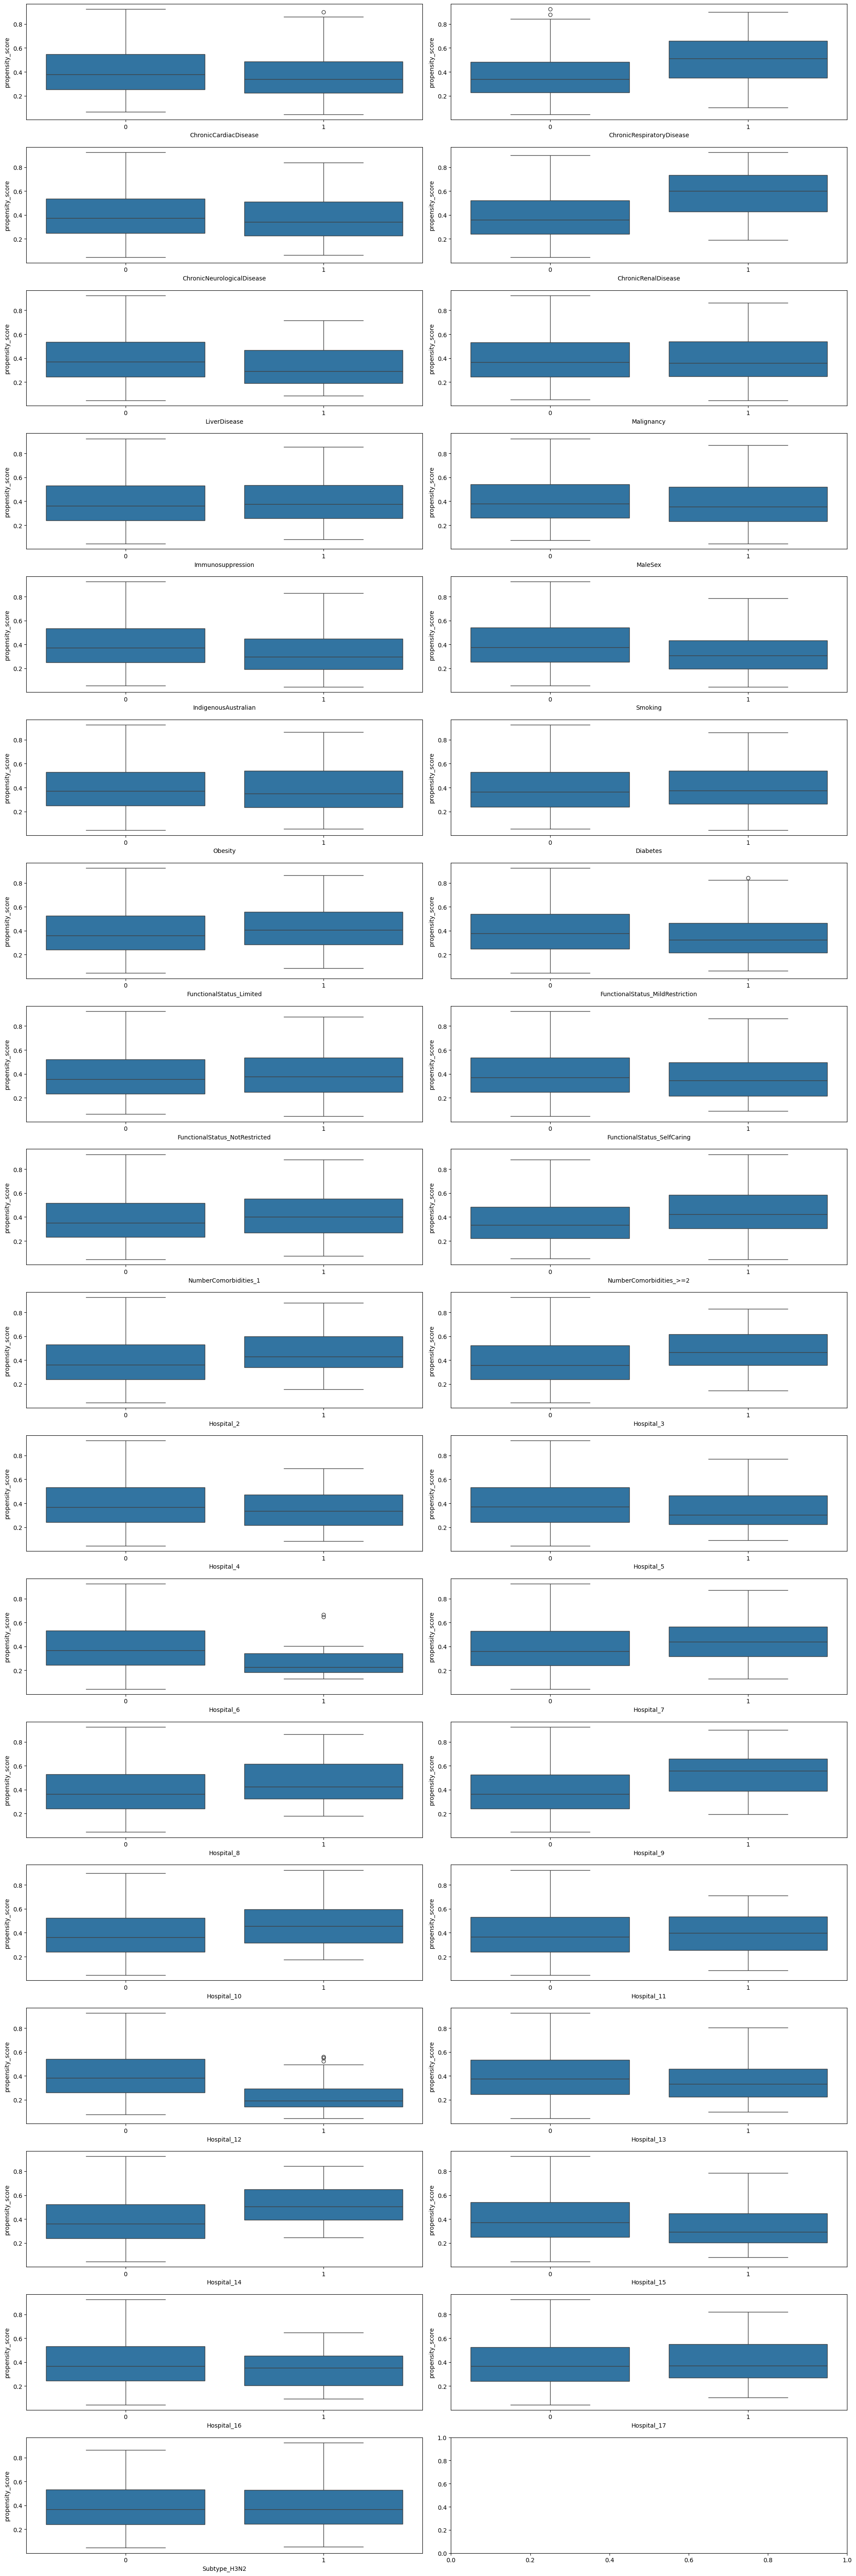

In [ ]:
confounders_cat=confounders.copy()
confounders_cat.remove("Age")
fig, axs = plt.subplots(nrows=int(len(confounders_cat)/2)+1, ncols=2, figsize=(20, 60))
axs = axs.flatten()

for (i,c) in enumerate(confounders_cat):
  sns.boxplot(x=c, y="propensity_score", data=data_ps, ax=axs[i])
fig.tight_layout()

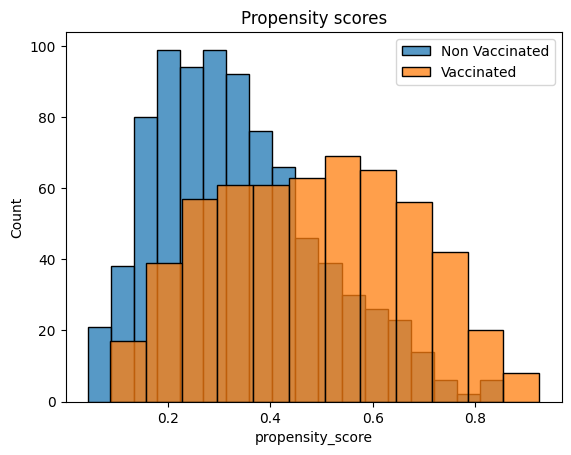

In [ ]:
sns.histplot(data_ps.query("Vaccinated==0")["propensity_score"], kde=False, label="Non Vaccinated")
sns.histplot(data_ps.query("Vaccinated==1")["propensity_score"], kde=False, label="Vaccinated")
plt.title("Propensity scores")
plt.legend();

## Propensity Score Matching

In [ ]:
cm = CausalModel(
    Y=data_ps["Survived"].values,
    D=data_ps["Vaccinated"].values,
    X=data_ps[["propensity_score"]].values
)

cm.est_propensity_s()
cm.cutoff = 0.0        #manually setting the threshold
cm.trim_s()    # automatically computing the best threshold

print('Trim cutoff', cm.cutoff)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Trim cutoff 0

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.011      0.044     -0.248      0.805     -0.098      0.076
           ATC     -0.030      0.053     -0.574      0.566     -0.133      0.073
           ATT      0.018      0.052      0.354      0.724     -0.084      0.121



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [ ]:
cm.summary_stats

{'N': 1415, 'K': 1, 'N_c': 857, 'N_t': 558, 'Y_c_mean': 0.7327887981330222, 'Y_t_mean': 0.5949820788530465, 'Y_c_sd': 0.44276192782824564, 'Y_t_sd': 0.49133597565300985, 'rdiff': -0.13780671927997568, 'X_c_mean': array([0.33689533]), 'X_t_mean': array([0.48255363]), 'X_c_sd': array([0.15999327]), 'X_t_sd': array([0.18924919]), 'ndiff': array([0.83122717])}

## IPTW

In [ ]:
# Compute IPTW weights
data_ps['weight'] = np.where(
    data_ps[T] == 1,  # For treated
    1 / data_ps['propensity_score'],
    1 / (1 - data_ps['propensity_score'])  # For untreated
)

In [ ]:
X = add_constant(data_ps[['Vaccinated']])
model = Logit(data_ps['Survived'], X).fit(weights=data_ps['weight'])

# Print model summary to view coefficients
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.617742
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1415
Model:                          Logit   Df Residuals:                     1413
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                 0.01639
Time:                        07:33:59   Log-Likelihood:                -874.11
converged:                       True   LL-Null:                       -888.67
Covariance Type:            nonrobust   LLR p-value:                 6.765e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0088      0.077     13.068      0.000       0.858       1.160
Vaccinated    -0.6242      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: weights. After release 0.14, this will raise.
  warnings.warn(


In [ ]:
np.exp(model.params['Vaccinated'])

0.5356800631305836

# Survival model

## Without adjustments

### Kaplain-Meier

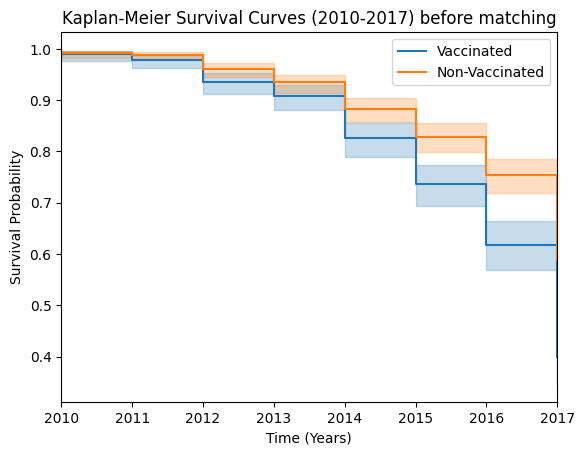

In [ ]:
df_enc['Death'] = 1 - df_enc['Survived']

vaccinated = df_enc[df_enc['Vaccinated'] == 1]
non_vaccinated = df_enc[df_enc['Vaccinated'] == 0]

# Kaplan-Meier for Vaccinated
kmf_vax = KaplanMeierFitter()
kmf_vax.fit(vaccinated['Year'], event_observed=vaccinated['Death'], label='Vaccinated')

# Kaplan-Meier for Non-Vaccinated
kmf_non_vax = KaplanMeierFitter()
kmf_non_vax.fit(non_vaccinated['Year'], event_observed=non_vaccinated['Death'], label='Non-Vaccinated')

kmf_vax.plot_survival_function()
kmf_non_vax.plot_survival_function()
plt.title('Kaplan-Meier Survival Curves (2010-2017) before matching')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.xlim(2010, 2017)
plt.legend()
plt.show()

In [ ]:
#log-rank
results = logrank_test(vaccinated['Year'], non_vaccinated['Year'],
                        event_observed_A=vaccinated['Death'],
                        event_observed_B=non_vaccinated['Death'])

print(f"P-value: {results.p_value}")

P-value: 2.3138801957445223e-08


### Survival model

In [ ]:
selected_columns = ['Year', 'Vaccinated', 'Death']
df_enc_2 = df_enc[selected_columns]

In [ ]:
#fit the model
cph = CoxPHFitter()
cph.fit(df_enc_2, duration_col = 'Year', event_col = 'Death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1415 total observations, 960 right-censored observations>
             duration col = 'Year'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 1415
number of events observed = 455
   partial log-likelihood = -2997.89
         time fit was run = 2025-01-14 07:34:00 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
Vaccinated  0.52      1.69      0.09            0.34            0.71                1.41                2.03

            cmp to    z      p  -log2(p)
covariate                               
Vaccinated    0.00 5.58 <0.005     25.32
---
Concordance = 0.56
Partial AIC = 5997.77
log-likelihood ratio test = 30.77 on 1 df
-log2(p) of ll-ratio test = 25.04

## After matching

### Kaplain-Meier

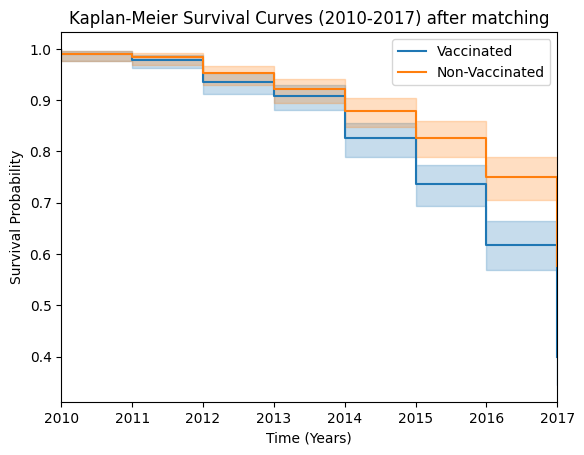

In [ ]:
matched['Death'] = 1 - matched['Survived']
vaccinated = matched[matched['Vaccinated'] == 1]
non_vaccinated = matched[matched['Vaccinated'] == 0]

# Kaplan-Meier for Vaccinated
kmf_vax = KaplanMeierFitter()
kmf_vax.fit(vaccinated['Year'], event_observed=vaccinated['Death'], label='Vaccinated')

# Kaplan-Meier for Non-Vaccinated
kmf_non_vax = KaplanMeierFitter()
kmf_non_vax.fit(non_vaccinated['Year'], event_observed=non_vaccinated['Death'], label='Non-Vaccinated')

kmf_vax.plot_survival_function()
kmf_non_vax.plot_survival_function()
plt.title('Kaplan-Meier Survival Curves (2010-2017) after matching')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.xlim(2010, 2017)
plt.legend()
plt.show()

In [ ]:
#log-rank
results = logrank_test(vaccinated['Year'], non_vaccinated['Year'],
                        event_observed_A=vaccinated['Death'],
                        event_observed_B=non_vaccinated['Death'])

print(f"P-value: {results.p_value}")

P-value: 3.122066628872529e-06


### Survival model

In [ ]:
selected_columns = [ 'Year', 'Vaccinated', 'Death']

matched = matched[selected_columns]

In [ ]:
#fit the model
cph = CoxPHFitter()
cph.fit(matched, duration_col = 'Year', event_col = 'Death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1116 total observations, 735 right-censored observations>
             duration col = 'Year'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 1116
number of events observed = 381
   partial log-likelihood = -2418.64
         time fit was run = 2025-01-14 07:34:00 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
Vaccinated  0.49      1.63      0.10            0.28            0.69                1.32                2.00

            cmp to    z      p  -log2(p)
covariate                               
Vaccinated    0.00 4.65 <0.005     18.23
---
Concordance = 0.56
Partial AIC = 4839.27
log-likelihood ratio test = 22.10 on 1 df
-log2(p) of ll-ratio test = 18.56

# ATE Estimates Recap

Naive estimation: -0.14

Naive LR est: 0.042

Optimal Matching: -0.136

PS matching: -0.001 (P= 0.976)

Rand Test: cannot refuse H_0 ==> ATE = 0

LR after matching: 0.09

# Subtypes Analysis

## Descriptive statistics

### H1N1

In [ ]:
table1 = TableOne(data_h1n1, columns=xvars, groupby='Vaccinated', pval=False)
print(table1)

/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


                                                  Grouped by Vaccinated                                       
                                                                Missing      Overall            0            1
n                                                                                600          364          236
Age, mean (SD)                                                        0  42.3 (26.9)  35.8 (23.7)  52.3 (28.4)
ChronicCardiacDisease, n (%)      0                                       433 (72.2)   258 (70.9)   175 (74.2)
                                  1                                       167 (27.8)   106 (29.1)    61 (25.8)
ChronicRespiratoryDisease, n (%)  0                                       465 (77.5)   293 (80.5)   172 (72.9)
                                  1                                       135 (22.5)    71 (19.5)    64 (27.1)
ChronicNeurologicalDisease, n (%) 0                                       496 (82.7)   303 (83.2)   193 (81.8)
 

In [ ]:
print(data_h1n1["Survived"].value_counts())
print(data_h1n1["Survived"].value_counts(normalize=True))
print(data_h1n1["Vaccinated"].value_counts())
print(data_h1n1["Vaccinated"].value_counts(normalize=True))
print(data_h1n1.groupby('Vaccinated')["Survived"].value_counts())
print(data_h1n1.groupby('Vaccinated')["Survived"].value_counts(normalize=True))

Survived
1    388
0    212
Name: count, dtype: int64
Survived
1    0.646667
0    0.353333
Name: proportion, dtype: float64
Vaccinated
0    364
1    236
Name: count, dtype: int64
Vaccinated
0    0.606667
1    0.393333
Name: proportion, dtype: float64
Vaccinated  Survived
0           1           257
            0           107
1           1           131
            0           105
Name: count, dtype: int64
Vaccinated  Survived
0           1           0.706044
            0           0.293956
1           1           0.555085
            0           0.444915
Name: proportion, dtype: float64


### H3N2

In [ ]:
table1 = TableOne(data_h3n2, columns=xvars, groupby='Vaccinated', pval=False)
print(table1)

/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


                                                  Grouped by Vaccinated                                       
                                                                Missing      Overall            0            1
n                                                                                815          493          322
Age, mean (SD)                                                        0  40.7 (27.4)  34.5 (23.4)  50.2 (30.2)
ChronicCardiacDisease, n (%)      0                                       560 (68.7)   331 (67.1)   229 (71.1)
                                  1                                       255 (31.3)   162 (32.9)    93 (28.9)
ChronicRespiratoryDisease, n (%)  0                                       666 (81.7)   423 (85.8)   243 (75.5)
                                  1                                       149 (18.3)    70 (14.2)    79 (24.5)
ChronicNeurologicalDisease, n (%) 0                                       665 (81.6)   396 (80.3)   269 (83.5)
 

In [ ]:
print(data_h3n2["Survived"].value_counts())
print(data_h3n2["Survived"].value_counts(normalize=True))
print(data_h3n2["Vaccinated"].value_counts())
print(data_h3n2["Vaccinated"].value_counts(normalize=True))
print(data_h3n2.groupby('Vaccinated')["Survived"].value_counts())
print(data_h3n2.groupby('Vaccinated')["Survived"].value_counts(normalize=True))

Survived
1    572
0    243
Name: count, dtype: int64
Survived
1    0.70184
0    0.29816
Name: proportion, dtype: float64
Vaccinated
0    493
1    322
Name: count, dtype: int64
Vaccinated
0    0.604908
1    0.395092
Name: proportion, dtype: float64
Vaccinated  Survived
0           1           371
            0           122
1           1           201
            0           121
Name: count, dtype: int64
Vaccinated  Survived
0           1           0.752535
            0           0.247465
1           1           0.624224
            0           0.375776
Name: proportion, dtype: float64


In [ ]:
confounders2=confounders.copy()
confounders2.remove('Subtype_H3N2')

## Optimal matching

In [ ]:
data_h1n1

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,Obesity,Diabetes,Age,FunctionalStatus,Hospital,Year,NumberComorbidities,Vaccinated,Survived,Subtype
0,1,0,1,0,0,0,0,1,0,0,0,0,28.0,NotRestricted,17,2016,>=2,1,1,H1N1
3,0,0,0,0,0,0,0,0,0,0,0,0,2.0,Limited,13,2016,>=2,1,1,H1N1
6,0,1,1,0,0,0,0,0,0,0,1,0,85.0,NotRestricted,17,2016,>=2,1,1,H1N1
7,0,0,0,0,1,0,1,1,0,0,0,1,11.0,NotRestricted,11,2013,0,1,1,H1N1
8,0,0,1,0,0,0,0,1,0,0,1,0,67.0,NotRestricted,1,2014,0,1,1,H1N1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,0,1,0,0,0,1,0,0,0,0,59.0,NotRestricted,3,2014,1,1,0,H1N1
1473,0,0,0,0,0,0,0,0,0,0,0,1,39.0,NotRestricted,2,2016,>=2,0,0,H1N1
1478,1,0,1,0,0,0,1,0,0,0,0,0,3.0,NotRestricted,12,2016,>=2,0,0,H1N1
1480,0,0,0,0,0,0,0,1,0,0,0,0,37.0,NotRestricted,17,2016,>=2,0,0,H1N1


### H1N1

In [ ]:
# Separate treated and untreated units
treated = data_h1n1_enc[data_h1n1_enc.Vaccinated == 1].copy()
untreated = data_h1n1_enc[data_h1n1_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders2].values
X_untreated = untreated[confounders2].values

# Compute the covariance matrix from the untreated units (for the Mahalanobis distance)
cov_matrix = np.cov(X_untreated.T)

# Inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Solve the optimal matching using linear_sum_assignment (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(mahalanobis_distances)

# For treated, assign the matched untreated indices to the 'match' column
treated['match'] = untreated.index[col_ind].values  # Map untreated index to treated

# Initialize the match column in untreated DataFrame to NaN first
untreated['match'] = np.nan

# For untreated, assign the matched treated indices to the 'match' column only for matched rows
untreated.loc[untreated.index[col_ind], 'match'] = treated.index[row_ind].values

# Filter to keep only rows where 'match' is not None (i.e., only matched units)
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units into a single DataFrame
matched = pd.concat([treated_matched, untreated_matched])

In [ ]:
len(matched) / len(data_h1n1_enc)

0.7866666666666666

In [ ]:
print(TableOne(matched, columns=confounders2, groupby='Vaccinated', smd=True))

                                          Grouped by Vaccinated                                              
                                                        Missing     Overall           0           1 SMD (0,1)
n                                                                       472         236         236          
Age, mean (SD)                                                0   0.1 (1.0)  -0.1 (0.9)   0.4 (1.1)     0.540
ChronicCardiacDisease, n (%)            0                        343 (72.7)  168 (71.2)  175 (74.2)     0.067
                                        1                        129 (27.3)   68 (28.8)   61 (25.8)          
ChronicRespiratoryDisease, n (%)        0                        364 (77.1)  192 (81.4)  172 (72.9)     0.203
                                        1                        108 (22.9)   44 (18.6)   64 (27.1)          
ChronicNeurologicalDisease, n (%)       0                        398 (84.3)  205 (86.9)  193 (81.8)     0.140
          

In [ ]:
#ATE after match
mean_treated = matched[matched['Vaccinated'] == 1]['Survived'].mean() #E[Y|T=1]
mean_untreated = matched[matched['Vaccinated'] == 0]['Survived'].mean() #E[Y|T=0]

optimal_matching_ate = mean_treated - mean_untreated

print(f"Optimal Matching ATE: {optimal_matching_ate}")

Optimal Matching ATE: -0.1271186440677966


### H3N2

In [ ]:
# Separate treated and untreated units
treated = data_h3n2_enc[data_h3n2_enc.Vaccinated == 1].copy()
untreated = data_h3n2_enc[data_h3n2_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders2].values
X_untreated = untreated[confounders2].values

# Compute the covariance matrix from the untreated units (for the Mahalanobis distance)
cov_matrix = np.cov(X_untreated.T)

# Inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Solve the optimal matching using linear_sum_assignment (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(mahalanobis_distances)

# For treated, assign the matched untreated indices to the 'match' column
treated['match'] = untreated.index[col_ind].values  # Map untreated index to treated

# Initialize the match column in untreated DataFrame to NaN first
untreated['match'] = np.nan

# For untreated, assign the matched treated indices to the 'match' column only for matched rows
untreated.loc[untreated.index[col_ind], 'match'] = treated.index[row_ind].values

# Filter to keep only rows where 'match' is not None (i.e., only matched units)
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units into a single DataFrame
matched = pd.concat([treated_matched, untreated_matched])

In [ ]:
len(matched) / len(data_h3n2_enc)

0.7901840490797546

In [ ]:
print(TableOne(matched, columns=confounders2, groupby='Vaccinated', smd=True))

                                          Grouped by Vaccinated                                              
                                                        Missing     Overall           0           1 SMD (0,1)
n                                                                       644         322         322          
Age, mean (SD)                                                0   0.1 (1.0)  -0.2 (0.8)   0.3 (1.1)     0.549
ChronicCardiacDisease, n (%)            0                        454 (70.5)  225 (69.9)  229 (71.1)     0.027
                                        1                        190 (29.5)   97 (30.1)   93 (28.9)          
ChronicRespiratoryDisease, n (%)        0                        524 (81.4)  281 (87.3)  243 (75.5)     0.307
                                        1                        120 (18.6)   41 (12.7)   79 (24.5)          
ChronicNeurologicalDisease, n (%)       0                        537 (83.4)  268 (83.2)  269 (83.5)     0.008
          

In [ ]:
#ATE after match
mean_treated = matched[matched['Vaccinated'] == 1]['Survived'].mean() #E[Y|T=1]
mean_untreated = matched[matched['Vaccinated'] == 0]['Survived'].mean() #E[Y|T=0]

optimal_matching_ate = mean_treated - mean_untreated

print(f"Optimal Matching ATE: {optimal_matching_ate}")

Optimal Matching ATE: -0.1428571428571428


## Propensity score

### H1N1

In [ ]:
data_h1n1_enc

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,...,Hospital_8,Hospital_9,Hospital_10,Hospital_11,Hospital_12,Hospital_13,Hospital_14,Hospital_15,Hospital_16,Hospital_17
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1480,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
T = 'Vaccinated'
X = data_h1n1_enc.columns.drop([T])

# Fit the logistic regression model
ps_model = LogisticRegression(C=1e6, max_iter=10000)
ps_model.fit(data_h1n1_enc[X], data_h1n1_enc[T])

# Add propensity scores to the dataset
data_ps = data_h1n1_enc.assign(propensity_score=ps_model.predict_proba(data_h1n1_enc[X])[:, 1])

print(data_ps[[T, "propensity_score"]].head())

   Vaccinated  propensity_score
0           1          0.449883
3           1          0.474585
6           1          0.883743
7           1          0.117495
8           1          0.476413


In [ ]:
cm = CausalModel(
    Y=data_ps["Survived"].values,
    D=data_ps["Vaccinated"].values,
    X=data_ps[["propensity_score"]].values
)

cm.est_propensity_s()
cm.cutoff = 0.1       #manually setting the threshold
cm.trim_s()    # automatically computing the best threshold

print('Trim cutoff', cm.cutoff)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Trim cutoff 0.09972482334719385

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.056      0.069     -0.812      0.417     -0.192      0.079
           ATC     -0.047      0.081     -0.575      0.565     -0.206      0.113
           ATT     -0.071      0.086     -0.826      0.409     -0.238      0.097



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


### H3N2

In [ ]:
data_h3n2_enc

,ChronicCardiacDisease,ChronicRespiratoryDisease,ChronicNeurologicalDisease,ChronicRenalDisease,LiverDisease,Malignancy,Immunosuppression,MaleSex,IndigenousAustralian,Smoking,...,Hospital_8,Hospital_9,Hospital_10,Hospital_11,Hospital_12,Hospital_13,Hospital_14,Hospital_15,Hospital_16,Hospital_17
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
13,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1475,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1476,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
T = 'Vaccinated'
X = data_h3n2_enc.columns.drop([T])

# Fit the logistic regression model
ps_model = LogisticRegression(C=1e6, max_iter=10000)
ps_model.fit(data_h3n2_enc[X], data_h3n2_enc[T])

# Add propensity scores to the dataset
data_ps = data_h3n2_enc.assign(propensity_score=ps_model.predict_proba(data_h3n2_enc[X])[:, 1])

print(data_ps[[T, "propensity_score"]].head())

    Vaccinated  propensity_score
1            1          0.465133
2            1          0.766755
4            1          0.585475
5            1          0.279019
13           1          0.452570


In [ ]:
cm = CausalModel(
    Y=data_ps["Survived"].values,
    D=data_ps["Vaccinated"].values,
    X=data_ps[["propensity_score"]].values
)

cm.est_propensity_s()
cm.cutoff = 0.11        #manually setting the threshold
cm.trim_s()    # automatically computing the best threshold

print('Trim cutoff', cm.cutoff)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Trim cutoff 0.11662421310321125

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.009      0.056      0.162      0.871     -0.102      0.120
           ATC     -0.006      0.067     -0.086      0.931     -0.137      0.126
           ATT      0.033      0.066      0.498      0.618     -0.097      0.163



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


# Over 60 (Not in the report)

not included in the report due to inconclusive results

In [ ]:
data_h1n1_over60 = df[(df['Subtype'] == 'H1N1') & (df['Age'] > 60)]
data_h3n2_over60 = df[(df['Subtype'] == 'H3N2') & (df['Age'] > 60)]

In [ ]:
#OneHotEncode
data_h1n1_over60_enc = pd.get_dummies(data_h1n1_over60, columns=['FunctionalStatus', 'NumberComorbidities', 'Hospital', 'Subtype'], drop_first=True)
data_h1n1_over60_enc = data_h1n1_over60_enc.astype(int)
data_h3n2_over60_enc = pd.get_dummies(data_h3n2_over60, columns=['FunctionalStatus', 'NumberComorbidities', 'Hospital', 'Subtype'], drop_first=True)
data_h3n2_over60_enc = data_h3n2_over60_enc.astype(int)

In [ ]:
#Standardization
scaler = StandardScaler()
data_h1n1_over60_enc[num_vars] = scaler.fit_transform(data_h1n1_over60_enc[num_vars])
data_h3n2_over60_enc[num_vars] = scaler.fit_transform(data_h3n2_over60_enc[num_vars])

## Descriptive statistics

### H1N1

In [ ]:
table1 = TableOne(data_h1n1_over60, columns=xvars, groupby='Vaccinated', pval=False)
print(table1)

/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


                                                      Grouped by Vaccinated                                       
                                                                    Missing      Overall            0            1
n                                                                                    164           62          102
Age, mean (SD)                                                            0  77.3 (11.8)  75.5 (11.5)  78.5 (11.9)
ChronicCardiacDisease, mean (SD)                                          0    0.3 (0.5)    0.3 (0.5)    0.3 (0.5)
ChronicRespiratoryDisease, mean (SD)                                      0    0.2 (0.4)    0.2 (0.4)    0.2 (0.4)
ChronicNeurologicalDisease, mean (SD)                                     0    0.2 (0.4)    0.1 (0.3)    0.2 (0.4)
ChronicRenalDisease, mean (SD)                                            0    0.0 (0.1)    0.0 (0.0)    0.0 (0.2)
LiverDisease, mean (SD)                                                   0    0

In [ ]:
print(data_h1n1_over60["Survived"].value_counts())
print(data_h1n1_over60["Survived"].value_counts(normalize=True))
print(data_h1n1_over60["Vaccinated"].value_counts())
print(data_h1n1_over60["Vaccinated"].value_counts(normalize=True))
print(data_h1n1_over60.groupby('Vaccinated')["Survived"].value_counts())
print(data_h1n1_over60.groupby('Vaccinated')["Survived"].value_counts(normalize=True))

Survived
0    85
1    79
Name: count, dtype: int64
Survived
0    0.518293
1    0.481707
Name: proportion, dtype: float64
Vaccinated
1    102
0     62
Name: count, dtype: int64
Vaccinated
1    0.621951
0    0.378049
Name: proportion, dtype: float64
Vaccinated  Survived
0           0           31
            1           31
1           0           54
            1           48
Name: count, dtype: int64
Vaccinated  Survived
0           0           0.500000
            1           0.500000
1           0           0.529412
            1           0.470588
Name: proportion, dtype: float64


### H3N2

In [ ]:
table1 = TableOne(data_h3n2_over60, columns=xvars, groupby='Vaccinated', pval=False)
print(table1)

/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self._categorical] = handle_categorical_nulls(data[self._categorical])


                                                      Grouped by Vaccinated                                       
                                                                    Missing      Overall            0            1
n                                                                                    224           75          149
Age, mean (SD)                                                            0  77.5 (11.0)  76.4 (11.9)  78.0 (10.6)
ChronicCardiacDisease, mean (SD)                                          0    0.3 (0.4)    0.3 (0.4)    0.3 (0.4)
ChronicRespiratoryDisease, mean (SD)                                      0    0.2 (0.4)    0.1 (0.4)    0.3 (0.4)
ChronicNeurologicalDisease, mean (SD)                                     0    0.2 (0.4)    0.2 (0.4)    0.2 (0.4)
ChronicRenalDisease, mean (SD)                                            0    0.0 (0.2)    0.0 (0.0)    0.1 (0.2)
LiverDisease, mean (SD)                                                   0    0

In [ ]:
print(data_h3n2_over60["Survived"].value_counts())
print(data_h3n2_over60["Survived"].value_counts(normalize=True))
print(data_h3n2_over60["Vaccinated"].value_counts())
print(data_h3n2_over60["Vaccinated"].value_counts(normalize=True))
print(data_h3n2_over60.groupby('Vaccinated')["Survived"].value_counts())
print(data_h3n2_over60.groupby('Vaccinated')["Survived"].value_counts(normalize=True))

Survived
0    114
1    110
Name: count, dtype: int64
Survived
0    0.508929
1    0.491071
Name: proportion, dtype: float64
Vaccinated
1    149
0     75
Name: count, dtype: int64
Vaccinated
1    0.665179
0    0.334821
Name: proportion, dtype: float64
Vaccinated  Survived
0           1           38
            0           37
1           0           77
            1           72
Name: count, dtype: int64
Vaccinated  Survived
0           1           0.506667
            0           0.493333
1           0           0.516779
            1           0.483221
Name: proportion, dtype: float64


## Optimal matching

In [ ]:
confounders2=confounders.copy()
confounders2.remove('Subtype_H3N2')
confounders2.remove('Hospital_6')

### H1N1

In [ ]:
# Separate treated and untreated units
treated = data_h1n1_over60_enc[data_h1n1_over60_enc.Vaccinated == 1].copy()
untreated = data_h1n1_over60_enc[data_h1n1_over60_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders2].values
X_untreated = untreated[confounders2].values

# Compute the covariance matrix from the untreated units (for the Mahalanobis distance)
cov_matrix = np.cov(X_untreated.T)

# Inverse of the covariance matrix
# Use pseudo-inverse to handle potential singularity
cov_inv = np.linalg.pinv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Solve the optimal matching using linear_sum_assignment (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(mahalanobis_distances)

# Create a 'match' column in the treated DataFrame and initialize with NaN
treated['match'] = np.nan

# Assign matched untreated indices to the 'match' column for the matched treated units
treated.loc[treated.index[row_ind], 'match'] = untreated.index[col_ind].values  # Map untreated index to treated

# Create a 'match' column in the untreated DataFrame and initialize with NaN
untreated['match'] = np.nan

# Assign matched treated indices to the 'match' column for the matched untreated units
untreated.loc[untreated.index[col_ind], 'match'] = treated.index[row_ind].values

# Filter to keep only rows where 'match' is not None (i.e., only matched units)
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units into a single DataFrame
matched = pd.concat([treated_matched, untreated_matched])

In [ ]:
print(TableOne(matched, columns=confounders2, groupby='Vaccinated', smd=True))

                                             Grouped by Vaccinated                                             
                                                           Missing     Overall           0          1 SMD (0,1)
n                                                                          124          62         62          
Age, mean (SD)                                                   0  -0.0 (1.0)  -0.2 (1.0)  0.1 (1.0)     0.225
ChronicCardiacDisease, mean (SD)                                 0   0.3 (0.4)   0.3 (0.5)  0.2 (0.4)    -0.290
ChronicRespiratoryDisease, mean (SD)                             0   0.2 (0.4)   0.2 (0.4)  0.2 (0.4)    <0.001
ChronicNeurologicalDisease, mean (SD)                            0   0.1 (0.4)   0.1 (0.3)  0.2 (0.4)     0.091
ChronicRenalDisease, mean (SD)                                   0   0.0 (0.1)   0.0 (0.0)  0.0 (0.2)     0.256
LiverDisease, mean (SD)                                          0   0.0 (0.2)   0.0 (0.2)  0.0 (0.1)   

### H3N2

In [ ]:
# Separate treated and untreated units
treated = data_h3n2_over60_enc[data_h3n2_over60_enc.Vaccinated == 1].copy()
untreated = data_h3n2_over60_enc[data_h3n2_over60_enc.Vaccinated == 0].copy()

# Covariate matrix
X_treated = treated[confounders2].values
X_untreated = untreated[confounders2].values

# Compute the covariance matrix from the untreated units (for the Mahalanobis distance)
cov_matrix = np.cov(X_untreated.T)

# Inverse of the covariance matrix
# Use pseudo-inverse to handle potential singularity
cov_inv = np.linalg.pinv(cov_matrix)

# Compute pairwise Mahalanobis distances between treated and untreated units
mahalanobis_distances = cdist(X_treated, X_untreated, metric='mahalanobis', VI=cov_inv)

# Solve the optimal matching using linear_sum_assignment (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(mahalanobis_distances)

# Create a 'match' column in the treated DataFrame and initialize with NaN
treated['match'] = np.nan

# Assign matched untreated indices to the 'match' column for the matched treated units
treated.loc[treated.index[row_ind], 'match'] = untreated.index[col_ind].values  # Map untreated index to treated

# Create a 'match' column in the untreated DataFrame and initialize with NaN
untreated['match'] = np.nan

# Assign matched treated indices to the 'match' column for the matched untreated units
untreated.loc[untreated.index[col_ind], 'match'] = treated.index[row_ind].values

# Filter to keep only rows where 'match' is not None (i.e., only matched units)
treated_matched = treated[treated['match'].notna()]
untreated_matched = untreated[untreated['match'].notna()]

# Combine the matched treated and untreated units into a single DataFrame
matched = pd.concat([treated_matched, untreated_matched])

In [ ]:
print(TableOne(matched, columns=confounders2, groupby='Vaccinated', smd=True))

                                             Grouped by Vaccinated                                              
                                                           Missing     Overall           0           1 SMD (0,1)
n                                                                          150          75          75          
Age, mean (SD)                                                   0  -0.1 (1.0)  -0.1 (1.1)  -0.1 (0.8)     0.005
ChronicCardiacDisease, mean (SD)                                 0   0.2 (0.4)   0.3 (0.4)   0.2 (0.4)    -0.124
ChronicRespiratoryDisease, mean (SD)                             0   0.1 (0.4)   0.1 (0.4)   0.1 (0.4)    <0.001
ChronicNeurologicalDisease, mean (SD)                            0   0.2 (0.4)   0.2 (0.4)   0.2 (0.4)    -0.200
ChronicRenalDisease, mean (SD)                                   0   0.0 (0.2)   0.0 (0.0)   0.1 (0.3)     0.414
LiverDisease, mean (SD)                                          0   0.0 (0.2)   0.1 (0.3)   0.0

## Propensity score

### H1N1

In [ ]:
T = 'Vaccinated'
X = data_h1n1_over60_enc.columns.drop([T])

# Fit the logistic regression model
ps_model = LogisticRegression(C=1e6, max_iter=10000)
ps_model.fit(data_h1n1_over60_enc[X], data_h1n1_over60_enc[T])

# Add propensity scores to the dataset
data_ps = data_h1n1_over60_enc.assign(propensity_score=ps_model.predict_proba(data_h1n1_over60_enc[X])[:, 1])

print(data_ps[[T, "propensity_score"]].head())

    Vaccinated  propensity_score
6            1          0.714782
8            1          0.458577
11           1          0.601754
19           1          0.756985
29           1          0.756917


In [ ]:
cm = CausalModel(
    Y=data_ps["Survived"].values,
    D=data_ps["Vaccinated"].values,
    X=data_ps[["propensity_score"]].values
)

cm.est_propensity_s()
cm.cutoff = 0.1        #manually setting the threshold
cm.trim_s()    # automatically computing the best threshold

print('Trim cutoff', cm.cutoff)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Trim cutoff 0.09242458815935495

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.079      0.158     -0.503      0.615     -0.388      0.230
           ATC     -0.002      0.179     -0.011      0.991     -0.353      0.349
           ATT     -0.129      0.191     -0.675      0.500     -0.504      0.246



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


###H3N2

In [ ]:
T = 'Vaccinated'
X = data_h3n2_over60_enc.columns.drop([T])

# Fit the logistic regression model
ps_model = LogisticRegression(C=1e6, max_iter=10000)
ps_model.fit(data_h3n2_over60_enc[X], data_h3n2_over60_enc[T])

# Add propensity scores to the dataset
data_ps = data_h3n2_over60_enc.assign(propensity_score=ps_model.predict_proba(data_h3n2_over60_enc[X])[:, 1])

print(data_ps[[T, "propensity_score"]].head())

    Vaccinated  propensity_score
4            1          0.778643
13           1          0.513815
15           1          0.771774
27           1          0.999983
28           1          0.999920


In [ ]:
cm = CausalModel(
    Y=data_ps["Survived"].values,
    D=data_ps["Vaccinated"].values,
    X=data_ps[["propensity_score"]].values
)

cm.est_propensity_s()
cm.cutoff = 0.1        #manually setting the threshold
cm.trim_s()    # automatically computing the best threshold

print('Trim cutoff', cm.cutoff)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Trim cutoff 0.10357170877496225

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.135      0.137     -0.982      0.326     -0.404      0.134
           ATC     -0.214      0.165     -1.295      0.195     -0.537      0.110
           ATT     -0.078      0.158     -0.492      0.623     -0.387      0.232



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
